<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/Untitled229_0101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
url = "https://mega.nz/file/tu0GXQzL#BGoVzch2_6s2EEQYLfkwpct1Uq-ZrRL2sHCOY54vohs"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip vegetables.v4i.yolov8.zip

In [ ]:
!pip install ultralytics

In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

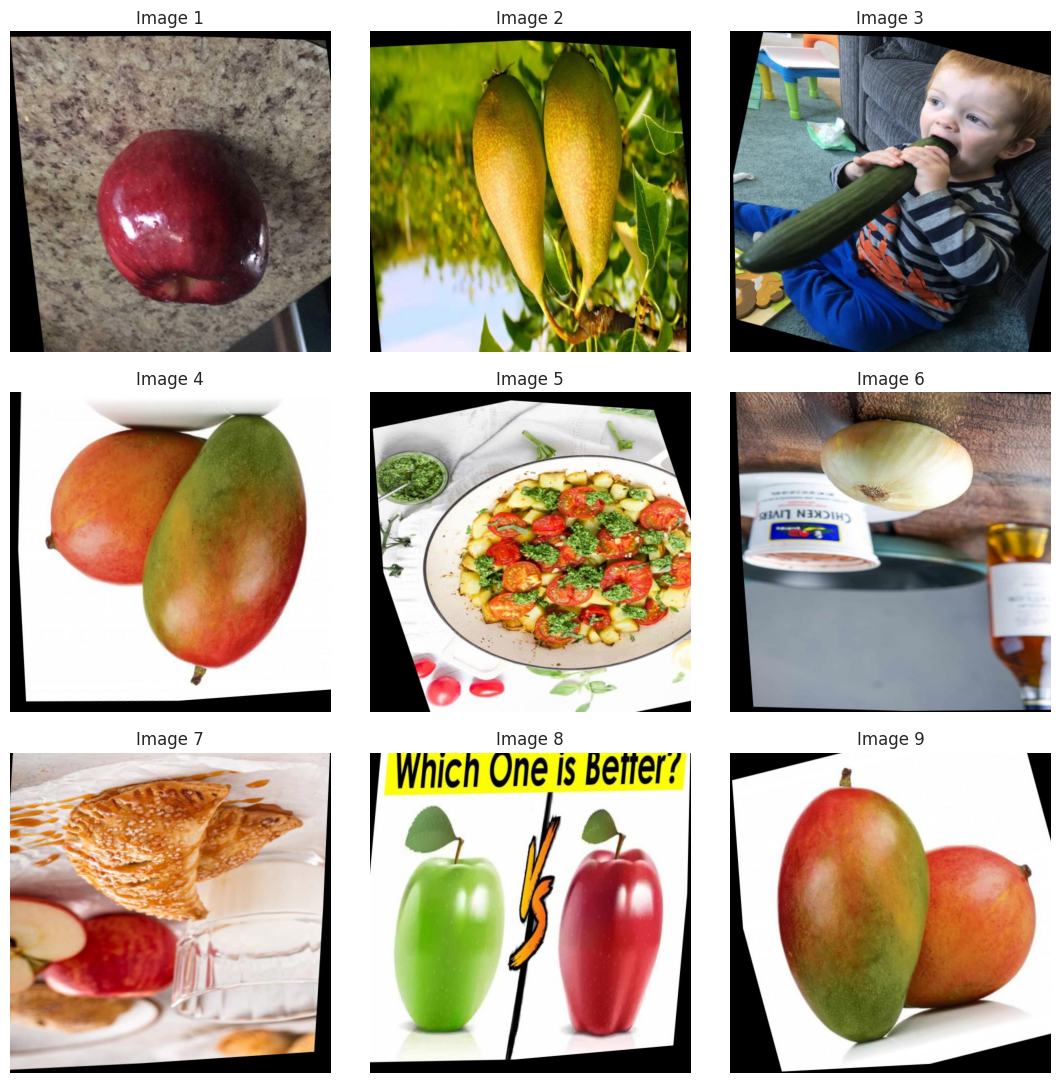

In [4]:
Image_dir = '/content/vegetables/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
image = cv2.imread("/content/vegetables/train/images/Banana1666000563_-7C-7C_sYb5_KM9e-Blr2sxnYmMg_png.rf.25bdbb3fc8925c3022aa65ea21466a46.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 61.7MB/s]



image 1/1 /content/vegetables/train/images/Banana1666000617_-7C-7C_h0zsVW6ijfXEtMoEeUz6g_png.rf.bf459ae4394e5a754050b616233ead21.jpg: 416x416 1 banana, 207.1ms
Speed: 17.1ms preprocess, 207.1ms inference, 30.8ms postprocess per image at shape (1, 3, 416, 416)


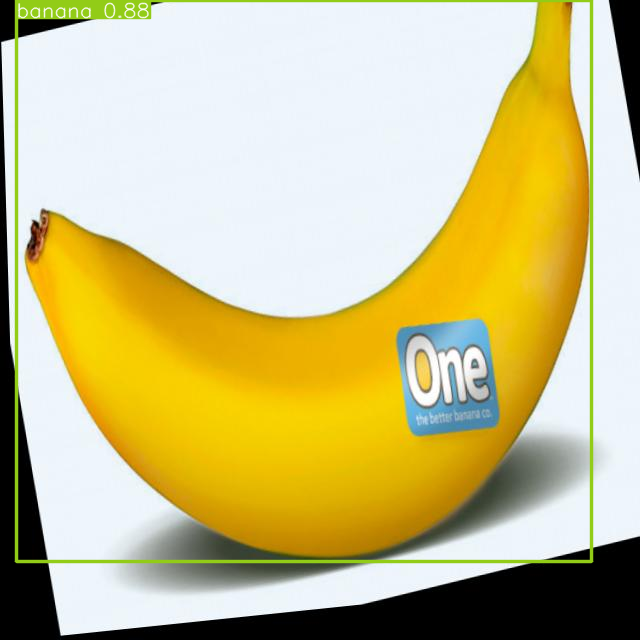

In [6]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/vegetables/train/images/Banana1666000617_-7C-7C_h0zsVW6ijfXEtMoEeUz6g_png.rf.bf459ae4394e5a754050b616233ead21.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
Final_model = YOLO('yolov8n.pt')

Result_Final_model = Final_model.train(data="/content/vegetables/data.yaml", epochs=70, imgsz=640, batch=64, lr0=0.0001, dropout=0.15, device='cpu')


Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/vegetables/data.yaml, epochs=70, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchs

100%|██████████| 755k/755k [00:00<00:00, 12.6MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/vegetables/train/labels... 1775 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1775/1775 [00:01<00:00, 1422.61it/s]

train: WARNING ⚠️ /content/vegetables/train/images/bell_pepper-2823-29_-7C-7C_Y8WkzpirbeHKnUfJKeuBw_jpg.rf.cf9e50ebe4302cc4b07f19a58fd5e9b8.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/vegetables/train/images/bell_pepper-2823-29_-7C-7C_Y8WkzpirbeHKnUfJKeuBw_jpg.rf.fdf346f0e07d898440c33a1407c2f98c.jpg: 1 duplicate labels removed
train: New cache created: /content/vegetables/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/vegetables/valid/labels... 256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 256/256 [00:00<00:00, 1474.34it/s]

val: New cache created: /content/vegetables/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      1.467      4.045       1.67        204        640: 100%|██████████| 28/28 [09:00<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.76s/it]

                   all        256        636     0.0222      0.527      0.047     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G      1.267      3.277      1.479        238        640: 100%|██████████| 28/28 [08:54<00:00, 19.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.71s/it]

                   all        256        636      0.735      0.185      0.201     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70         0G      1.298      2.661      1.502        234        640: 100%|██████████| 28/28 [09:00<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.98s/it]

                   all        256        636      0.562      0.241      0.243     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70         0G      1.284      2.272      1.472        198        640: 100%|██████████| 28/28 [09:02<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.41s/it]

                   all        256        636      0.499      0.333      0.324      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70         0G      1.264      2.054      1.459        222        640: 100%|██████████| 28/28 [08:56<00:00, 19.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.57s/it]

                   all        256        636      0.431      0.355      0.311      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      1.254      1.853      1.427        259        640: 100%|██████████| 28/28 [08:59<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.36s/it]

                   all        256        636      0.572       0.41       0.45       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70         0G      1.228      1.788       1.42        168        640: 100%|██████████| 28/28 [09:01<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.32s/it]

                   all        256        636      0.504      0.444      0.446      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70         0G      1.215      1.665      1.395        182        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.05s/it]

                   all        256        636      0.539      0.469      0.455      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70         0G      1.206      1.578      1.391        225        640: 100%|██████████| 28/28 [09:00<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.80s/it]

                   all        256        636      0.569      0.496      0.505      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70         0G      1.187      1.474      1.371        218        640: 100%|██████████| 28/28 [09:00<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.98s/it]

                   all        256        636      0.607      0.523      0.549      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70         0G      1.152      1.423      1.354        256        640: 100%|██████████| 28/28 [09:00<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.51s/it]

                   all        256        636      0.728      0.499      0.583      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70         0G      1.137      1.354      1.335        211        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.69s/it]

                   all        256        636      0.549      0.497      0.534      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70         0G       1.15      1.344      1.348        219        640: 100%|██████████| 28/28 [08:59<00:00, 19.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.15s/it]

                   all        256        636       0.58      0.549      0.585      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70         0G      1.132      1.268      1.323        251        640: 100%|██████████| 28/28 [09:00<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.60s/it]

                   all        256        636      0.582      0.533      0.549      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70         0G      1.133      1.235      1.334        190        640: 100%|██████████| 28/28 [08:54<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.56s/it]

                   all        256        636      0.671      0.577      0.605      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70         0G       1.11      1.169       1.31        215        640: 100%|██████████| 28/28 [09:04<00:00, 19.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.95s/it]

                   all        256        636      0.593      0.498      0.528      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70         0G      1.113      1.161      1.306        184        640: 100%|██████████| 28/28 [09:02<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.83s/it]

                   all        256        636      0.576      0.523      0.511       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70         0G      1.081      1.123      1.297        218        640: 100%|██████████| 28/28 [09:03<00:00, 19.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.20s/it]

                   all        256        636      0.496      0.523      0.544      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70         0G      1.075      1.105      1.294        246        640: 100%|██████████| 28/28 [08:58<00:00, 19.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.54s/it]

                   all        256        636      0.622      0.574      0.589      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70         0G      1.054      1.054      1.278        249        640: 100%|██████████| 28/28 [09:00<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.83s/it]

                   all        256        636      0.607      0.543      0.596      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70         0G      1.066      1.032      1.275        242        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.08s/it]

                   all        256        636      0.656      0.597       0.63      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70         0G      1.049      1.014      1.277        210        640: 100%|██████████| 28/28 [08:57<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.64s/it]

                   all        256        636      0.661      0.568      0.633      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70         0G      1.056      1.007      1.266        230        640: 100%|██████████| 28/28 [08:58<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.82s/it]

                   all        256        636      0.671      0.613      0.676      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70         0G      1.045     0.9725      1.273        210        640: 100%|██████████| 28/28 [09:02<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.55s/it]

                   all        256        636      0.613      0.575      0.614      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70         0G       1.02     0.9558      1.249        217        640: 100%|██████████| 28/28 [08:59<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.17s/it]

                   all        256        636       0.61      0.552        0.6      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70         0G      1.016     0.9556      1.254        247        640: 100%|██████████| 28/28 [08:56<00:00, 19.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.33s/it]

                   all        256        636       0.58      0.626       0.62      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70         0G      1.019     0.9101       1.25        241        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.06s/it]

                   all        256        636      0.753      0.574      0.666      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70         0G      1.017     0.9005      1.244        219        640: 100%|██████████| 28/28 [09:01<00:00, 19.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.10s/it]

                   all        256        636      0.681      0.527      0.594      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70         0G      1.007     0.8974      1.247        185        640: 100%|██████████| 28/28 [09:02<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.41s/it]

                   all        256        636      0.708      0.521      0.619      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70         0G     0.9784     0.8715      1.235        242        640: 100%|██████████| 28/28 [09:04<00:00, 19.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.15s/it]

                   all        256        636      0.666      0.544      0.602      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70         0G     0.9825     0.8599      1.232        269        640: 100%|██████████| 28/28 [09:03<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.59s/it]

                   all        256        636      0.681      0.618      0.653      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70         0G     0.9795     0.8447       1.22        193        640: 100%|██████████| 28/28 [09:05<00:00, 19.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.24s/it]

                   all        256        636      0.617      0.594      0.642      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70         0G     0.9797     0.8367      1.231        201        640: 100%|██████████| 28/28 [09:01<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.47s/it]

                   all        256        636      0.754      0.543      0.647      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70         0G     0.9678     0.8143      1.217        261        640: 100%|██████████| 28/28 [09:02<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.00s/it]

                   all        256        636      0.631      0.583      0.631      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70         0G     0.9597     0.8082      1.205        205        640: 100%|██████████| 28/28 [08:56<00:00, 19.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.15s/it]

                   all        256        636      0.697      0.567      0.628      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70         0G     0.9533     0.7914      1.208        247        640: 100%|██████████| 28/28 [09:02<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.80s/it]

                   all        256        636      0.608      0.568      0.634      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70         0G     0.9497     0.7703      1.196        224        640: 100%|██████████| 28/28 [09:02<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.06s/it]

                   all        256        636      0.649      0.566      0.638      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70         0G     0.9506     0.7936      1.204        227        640: 100%|██████████| 28/28 [09:03<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.96s/it]

                   all        256        636      0.665      0.573      0.641      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70         0G     0.9281     0.7653      1.195        211        640: 100%|██████████| 28/28 [09:00<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.61s/it]

                   all        256        636      0.587      0.667      0.656      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70         0G     0.9212     0.7556      1.184        229        640: 100%|██████████| 28/28 [08:59<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.74s/it]

                   all        256        636      0.637      0.574      0.625      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70         0G     0.9259     0.7561      1.198        260        640: 100%|██████████| 28/28 [09:03<00:00, 19.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.11s/it]

                   all        256        636      0.667      0.593      0.638      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70         0G     0.9162     0.7382      1.188        214        640: 100%|██████████| 28/28 [08:58<00:00, 19.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.91s/it]

                   all        256        636      0.727      0.605      0.669      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70         0G     0.8962     0.7112      1.176        222        640: 100%|██████████| 28/28 [08:59<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.25s/it]

                   all        256        636      0.629      0.607      0.653      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70         0G     0.9026     0.7294      1.179        216        640: 100%|██████████| 28/28 [09:00<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.18s/it]

                   all        256        636      0.597      0.615      0.657      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70         0G     0.8858      0.706      1.175        238        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.89s/it]

                   all        256        636        0.7      0.622      0.689      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70         0G     0.8898     0.7109      1.171        215        640: 100%|██████████| 28/28 [08:57<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.94s/it]

                   all        256        636      0.651      0.658      0.683      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70         0G     0.8987     0.6966      1.175        227        640: 100%|██████████| 28/28 [09:00<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.49s/it]

                   all        256        636      0.625      0.612      0.658      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70         0G     0.8849     0.6868      1.167        218        640: 100%|██████████| 28/28 [09:04<00:00, 19.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.81s/it]

                   all        256        636      0.644      0.616      0.659      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70         0G     0.8629     0.6782      1.158        217        640: 100%|██████████| 28/28 [09:01<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.32s/it]

                   all        256        636      0.624      0.606      0.662      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70         0G     0.8657     0.6786      1.161        226        640: 100%|██████████| 28/28 [09:05<00:00, 19.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.12s/it]

                   all        256        636      0.666      0.619      0.649      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70         0G       0.87     0.6908       1.16        247        640: 100%|██████████| 28/28 [09:06<00:00, 19.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.46s/it]

                   all        256        636      0.633      0.614       0.66      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70         0G     0.8547     0.6663      1.143        251        640: 100%|██████████| 28/28 [09:07<00:00, 19.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.61s/it]

                   all        256        636      0.677      0.595      0.632      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70         0G     0.8476     0.6565      1.148        226        640: 100%|██████████| 28/28 [09:13<00:00, 19.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.16s/it]

                   all        256        636      0.736      0.573       0.66      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70         0G     0.8457     0.6589      1.149        231        640: 100%|██████████| 28/28 [09:13<00:00, 19.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.15s/it]

                   all        256        636      0.703      0.608      0.693      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70         0G     0.8384     0.6554      1.142        184        640: 100%|██████████| 28/28 [09:12<00:00, 19.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.15s/it]

                   all        256        636      0.736      0.628      0.687       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70         0G     0.8368     0.6556      1.137        251        640: 100%|██████████| 28/28 [09:07<00:00, 19.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.35s/it]

                   all        256        636      0.633      0.622       0.67      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70         0G      0.839     0.6368       1.13        245        640: 100%|██████████| 28/28 [09:09<00:00, 19.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.38s/it]

                   all        256        636      0.659       0.62       0.67      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70         0G     0.8297     0.6152      1.131        214        640: 100%|██████████| 28/28 [09:05<00:00, 19.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.48s/it]

                   all        256        636      0.639       0.64      0.681      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70         0G     0.8234     0.6253      1.134        248        640: 100%|██████████| 28/28 [09:14<00:00, 19.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.62s/it]

                   all        256        636      0.617      0.685      0.689      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70         0G     0.8209     0.6256      1.138        196        640: 100%|██████████| 28/28 [09:08<00:00, 19.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.08s/it]

                   all        256        636      0.689      0.634      0.698      0.389


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70         0G     0.7399     0.4871       1.09        152        640: 100%|██████████| 28/28 [08:52<00:00, 19.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.73s/it]

                   all        256        636      0.702      0.621      0.685      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70         0G     0.7293     0.4653      1.087        119        640: 100%|██████████| 28/28 [08:46<00:00, 18.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.80s/it]

                   all        256        636      0.644       0.65      0.684      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70         0G     0.7101     0.4451      1.075         93        640: 100%|██████████| 28/28 [08:50<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.94s/it]

                   all        256        636      0.679      0.649      0.689      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70         0G     0.6866     0.4282      1.058         99        640: 100%|██████████| 28/28 [08:50<00:00, 18.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.65s/it]

                   all        256        636      0.685      0.635      0.678      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70         0G     0.6889     0.4329      1.063        100        640: 100%|██████████| 28/28 [08:59<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.82s/it]

                   all        256        636      0.653      0.677      0.686       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70         0G     0.6669     0.4193      1.044        105        640: 100%|██████████| 28/28 [08:59<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.59s/it]

                   all        256        636      0.726      0.637      0.679      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70         0G     0.6673     0.4145       1.04        125        640: 100%|██████████| 28/28 [08:54<00:00, 19.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.08s/it]

                   all        256        636        0.7      0.636      0.674      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70         0G     0.6628     0.4133      1.043        128        640: 100%|██████████| 28/28 [08:49<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.08s/it]

                   all        256        636      0.681      0.646      0.682      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70         0G     0.6558     0.4124      1.038         99        640: 100%|██████████| 28/28 [08:47<00:00, 18.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.99s/it]

                   all        256        636      0.668      0.658      0.682      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70         0G     0.6565     0.4115      1.043        171        640: 100%|██████████| 28/28 [08:50<00:00, 18.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.71s/it]

                   all        256        636      0.656      0.663      0.679       0.38



70 epochs completed in 11.074 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3009158 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.73s/it]


                   all        256        636      0.656      0.565      0.634      0.414
                 apple        256         76      0.879      0.667      0.826      0.545
                banana        256         25      0.549       0.84       0.77      0.524
           bell_pepper        256         74      0.579      0.932      0.902      0.646
                carrot        256         27       0.63       0.38      0.461      0.267
           cauliflower        256         15          1      0.856      0.948      0.592
              chillies        256         16      0.501      0.312      0.343      0.202
              cucumber        256         23       0.19          1      0.702      0.357
                garlic        256          3          1          0      0.618      0.481
                grapes        256         49      0.794      0.918      0.914      0.519
                 mango        256         17      0.187      0.353      0.175      0.132
              mushroo

In [8]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

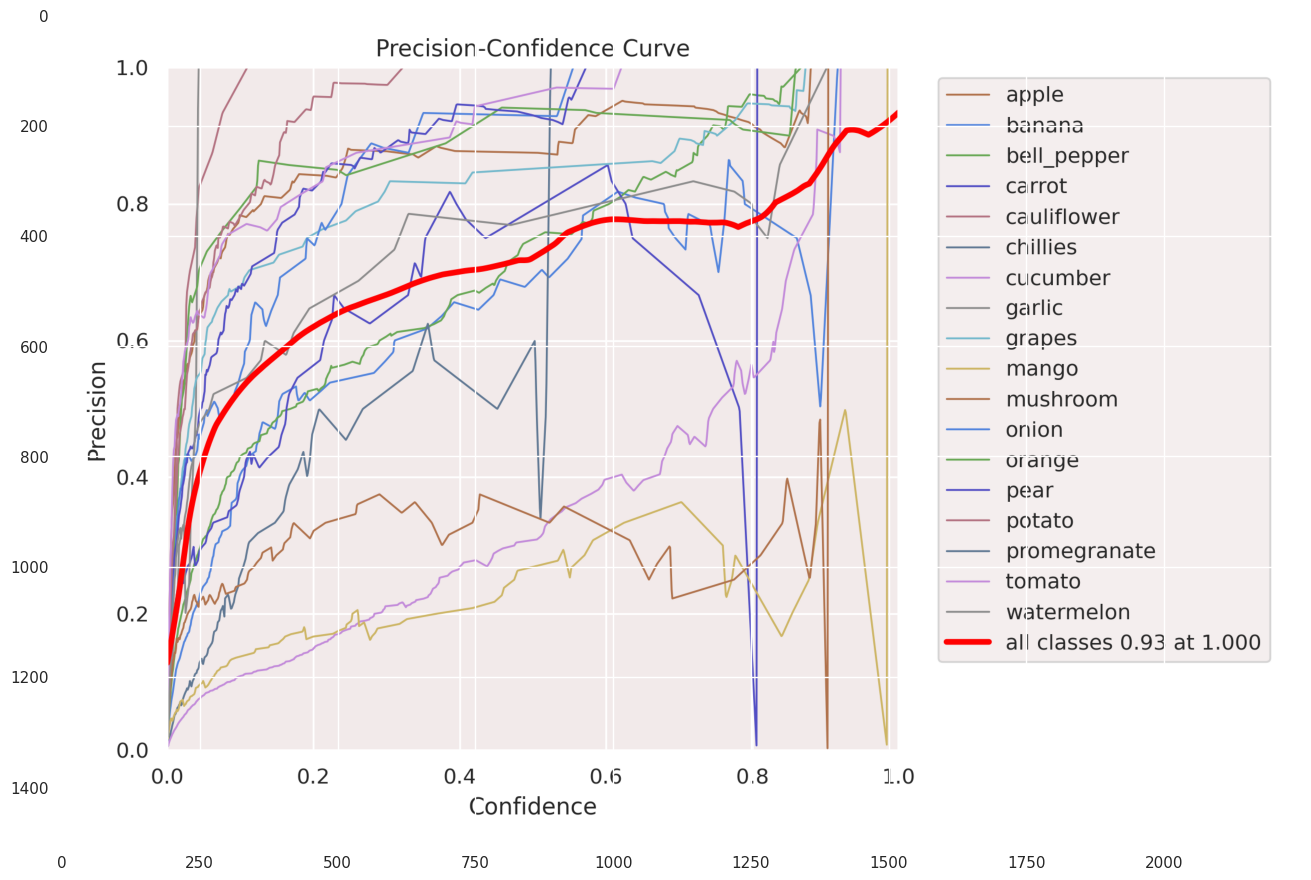

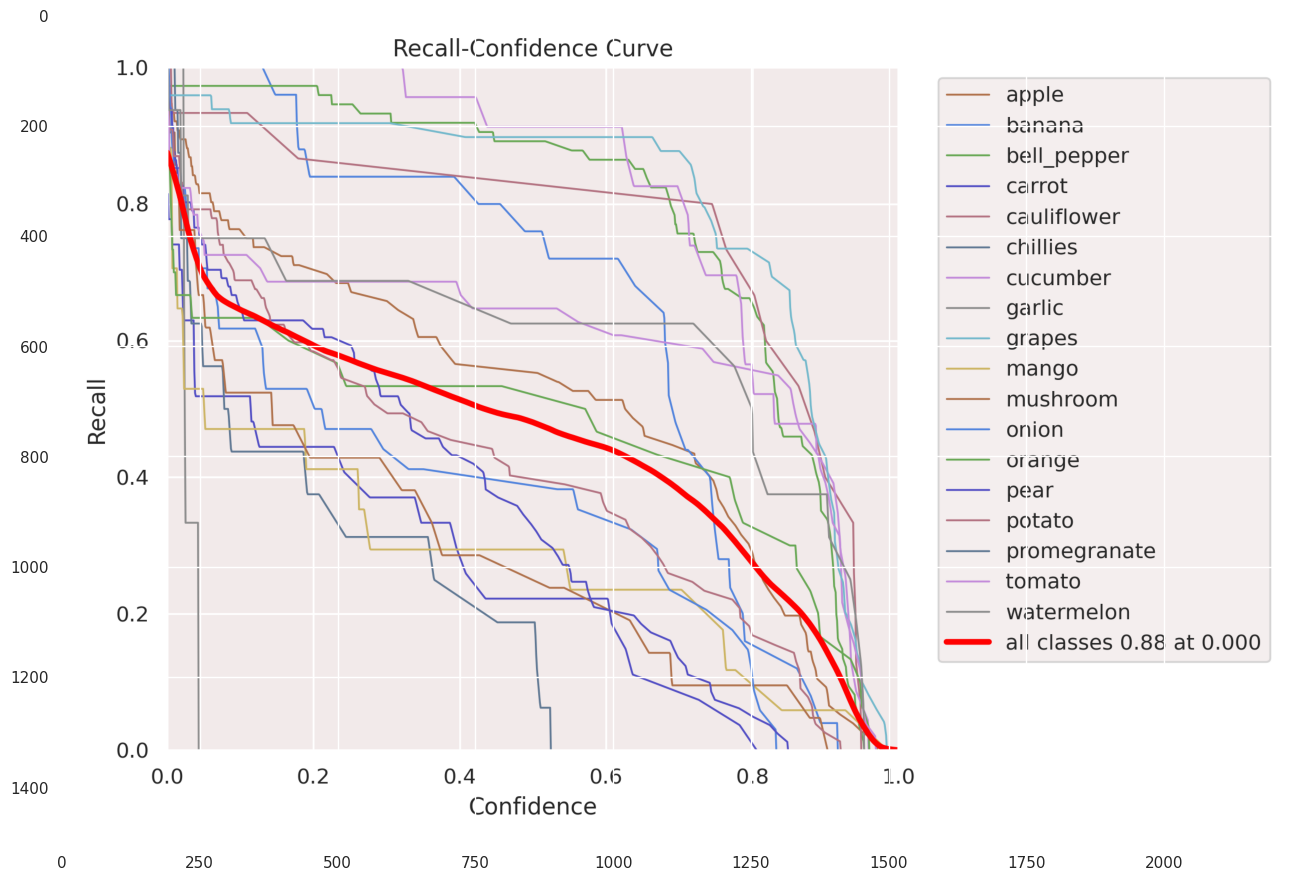

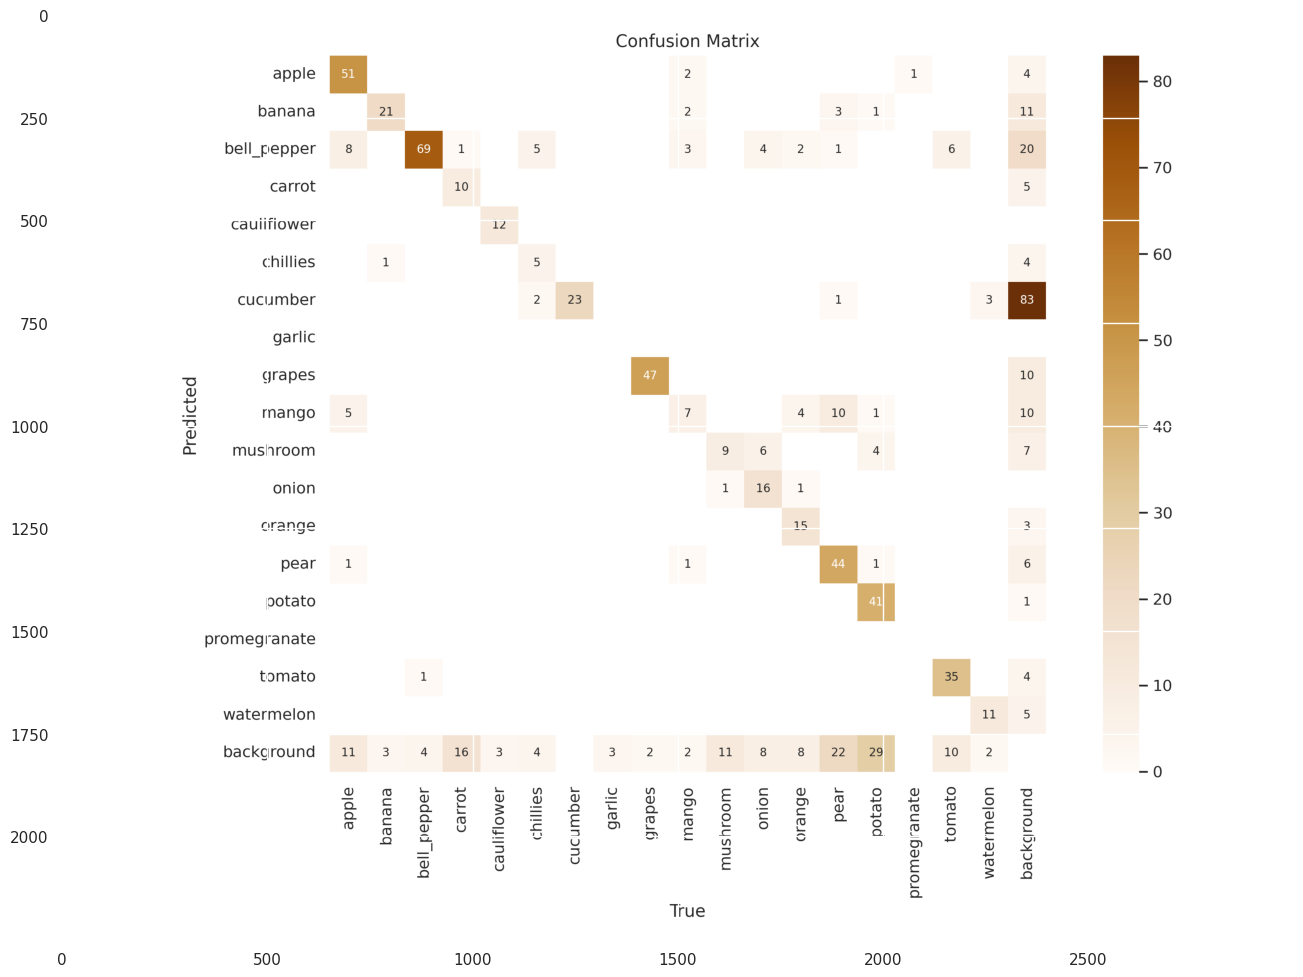

In [9]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [10]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
60                       61                  0.73987                  0.48713   
61                       62                  0.72929                  0.46529   
62                       63                  0.71005                  0.44507   
63                       64                  0.68662                  0.42823   
64                       65                  0.68888                  0.43292   
65                       66                  0.66693                  0.41931   
66                       67                  0.66729                  0.41452   
67                       68                  0.66278                  0.41327   
68                       69                  0.65580                  0.41239   
69                       70                  0.65646                  0.41146   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
60                   1.0902                  0.70183                  0.62090   
61                   1.0874                  0.64355                  0.65001   
62                   1.0746                  0.67903                  0.64885   
63                   1.0580                  0.68485                  0.63465   
64                   1.0627                  0.65255                  0.67693   
65                   1.0439                  0.72634                  0.63710   
66                   1.0399                  0.69996                  0.63588   
67                   1.0429                  0.68103                  0.64618   
68                   1.0384                  0.66779                  0.65784   
69                   1.0432                  0.65635                  0.66291   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
60                  0.68516                  0.40102                   1.4882   
61                  0.68438                  0.38097                   1.5968   
62                  0.68905                  0.39236                   1.4981   
63                  0.67814                  0.39845                   1.4437   
64                  0.68576                  0.35991                   1.6448   
65                  0.67896                  0.37805                   1.5695   
66                  0.67383                  0.38885                   1.5180   
67                  0.68236                  0.39266                   1.5308   
68                  0.68174                  0.38211                   1.5580   
69                  0.67926                  0.38004                   1.5765   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
60                   1.0805                   1.5962                 0.000075   
61                   1.0880                   1.7048                 0.000069   
62                   1.0847                   1.6131                 0.000062   
63                   1.1062                   1.5697                 0.000056   
64                   1.1286                   1.7625                 0.000050   
65                   1.1566                   1.6885                 0.000043   
66                   1.1335                   1.6476                 0.000037   
67                   1.1135                   1.6639                 0.000030   
68                   1.1115                   1.6907                 0.000024   
69                   1.1152                   1.7019                 0.000017   

                     lr/pg1                   lr/pg2  
60                 0.000075                 0.000075  
61                 0.000069                 0.000069  
62                 0.000062                 0.000062  
63                 0.000056                 0.000056  
64                 0.000050                 0.000050  
65                 0.000043                 0.000043  
66                 0.000037                 0.000037  
67            

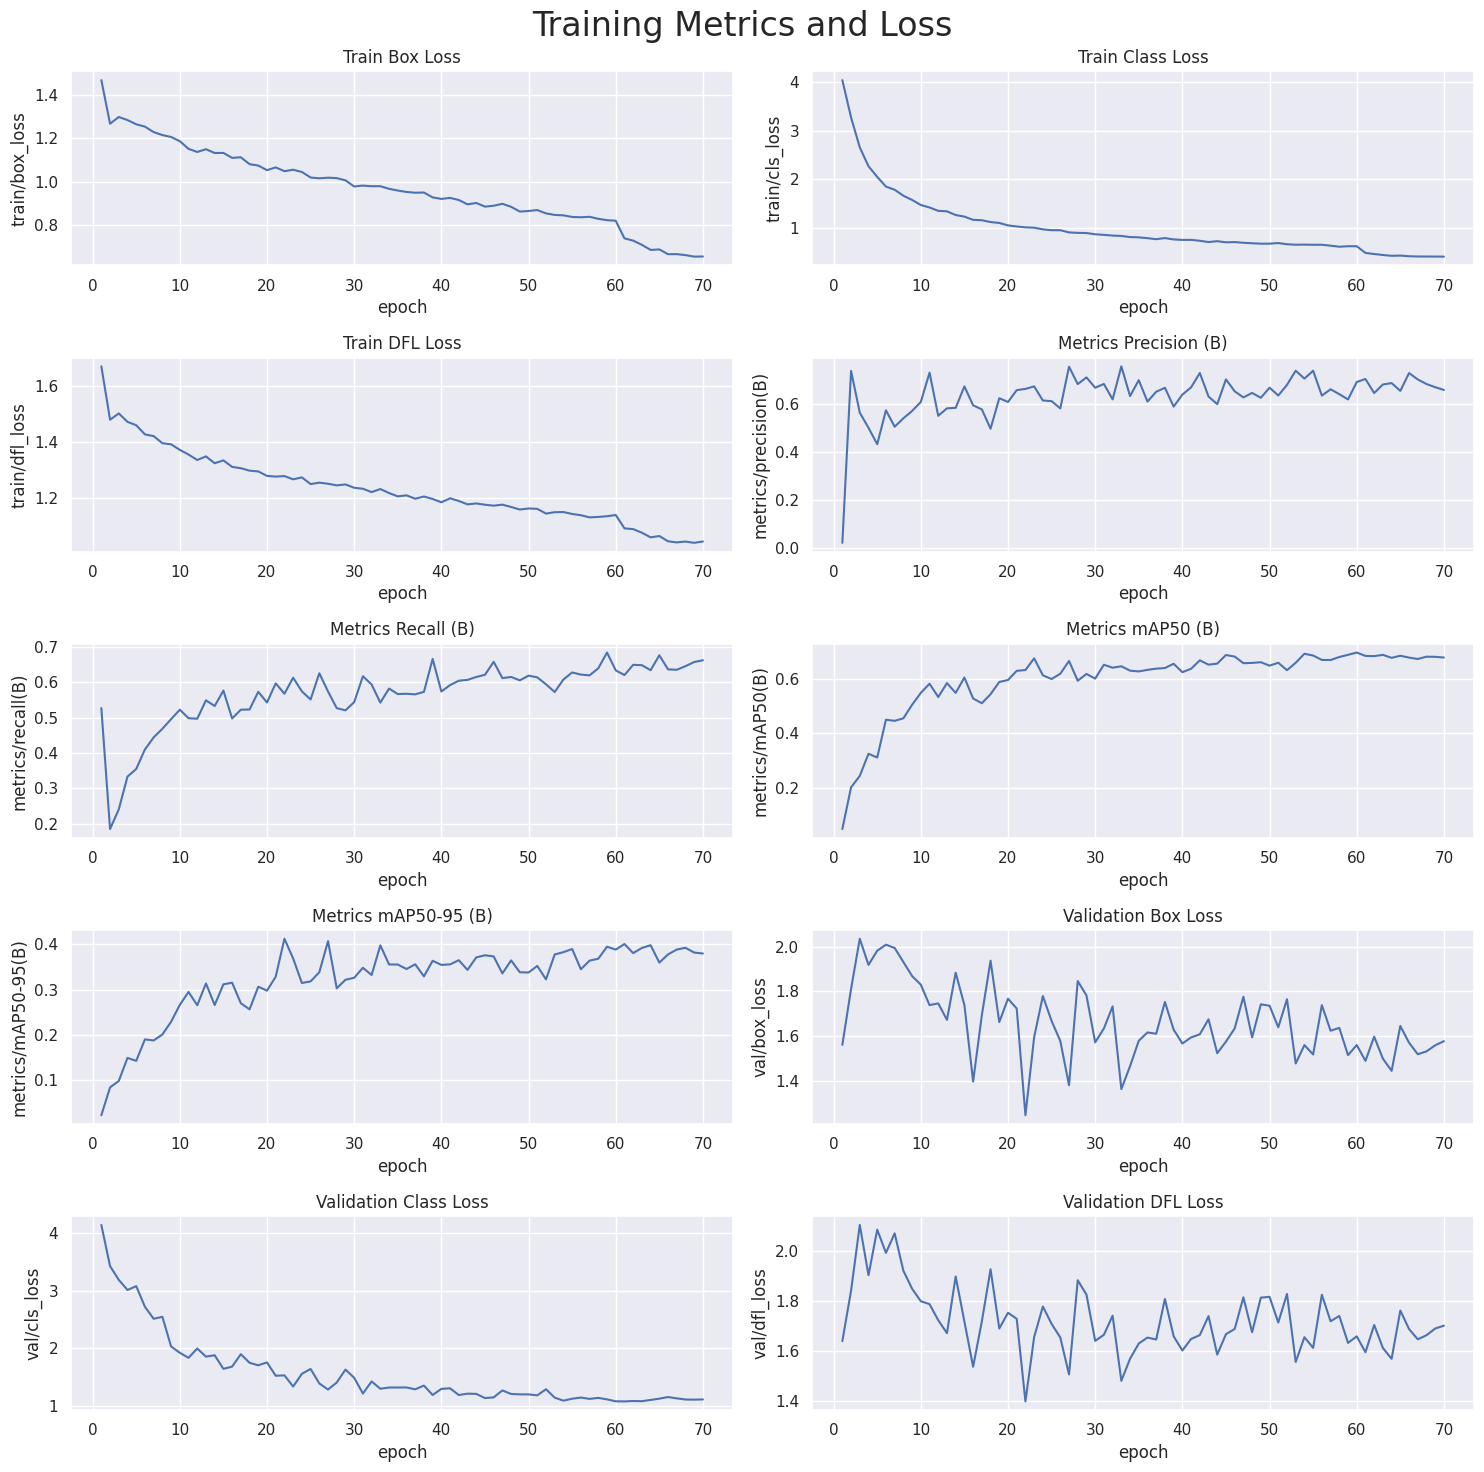

In [11]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0, 0].set(title='Train Box Loss')
axs[0, 1].set(title='Train Class Loss')
axs[1, 0].set(title='Train DFL Loss')
axs[1, 1].set(title='Metrics Precision (B)')
axs[2, 0].set(title='Metrics Recall (B)')
axs[2, 1].set(title='Metrics mAP50 (B)')
axs[3, 0].set(title='Metrics mAP50-95 (B)')
axs[3, 1].set(title='Validation Box Loss')
axs[4, 0].set(title='Validation Class Loss')
axs[4, 1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [12]:
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3009158 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/vegetables/test/labels... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<00:00, 1621.83it/s]

val: New cache created: /content/vegetables/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.40s/it]


                   all        129        314      0.668      0.647      0.689      0.419
                 apple        129         11      0.665      0.545      0.598        0.4
                banana        129          6      0.147      0.833      0.205     0.0833
           bell_pepper        129         27      0.673      0.815      0.826      0.565
                carrot        129         28      0.859       0.75       0.88       0.45
           cauliflower        129         13       0.94      0.769      0.834      0.536
              chillies        129          2      0.791        0.5      0.498        0.2
              cucumber        129         18      0.233      0.778       0.53      0.259
                garlic        129         10          1          0      0.649      0.375
                grapes        129         23       0.74      0.826      0.841      0.459
                 mango        129         15      0.644        0.8      0.776      0.605
              mushroo

In [13]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.6683654683869071
metrics/recall(B):  0.6469784365514327
metrics/mAP50(B):  0.6891357208388977
metrics/mAP50-95(B):  0.419425722459645


In [17]:
image_dir = '/content/vegetables/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)



0: 416x416 2 cucumbers, 2 mangos, 63.5ms
Speed: 2.7ms preprocess, 63.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train12

0: 416x416 1 cauliflower, 56.3ms
Speed: 4.6ms preprocess, 56.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train13

0: 416x416 1 watermelon, 64.0ms
Speed: 2.9ms preprocess, 64.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train14

0: 416x416 10 tomatos, 47.6ms
Speed: 3.3ms preprocess, 47.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train15

0: 416x416 4 carrots, 44.8ms
Speed: 2.0ms preprocess, 44.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train16

0: 416x416 1 grapes, 44.7ms
Speed: 2.5ms preprocess, 44.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train

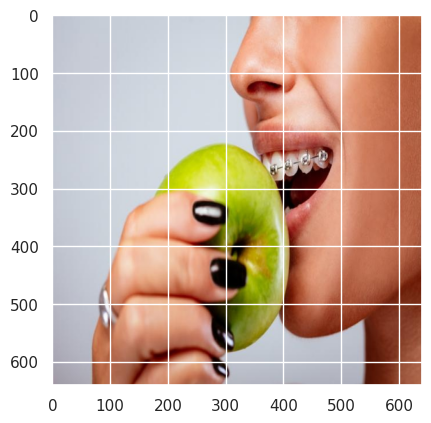

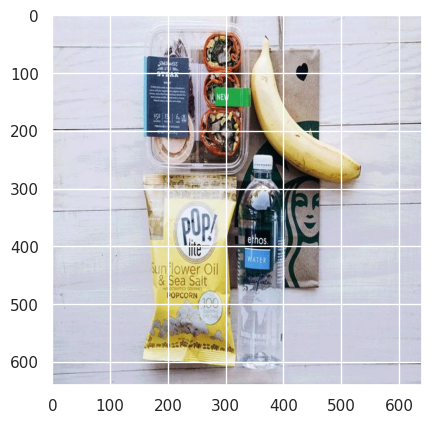

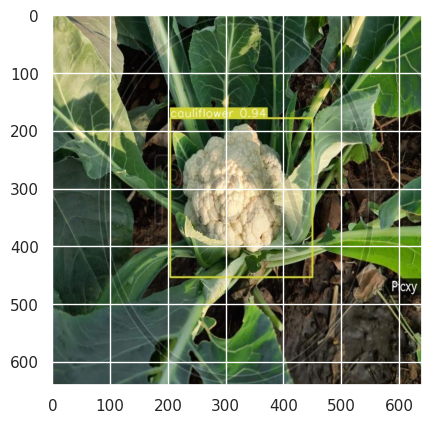

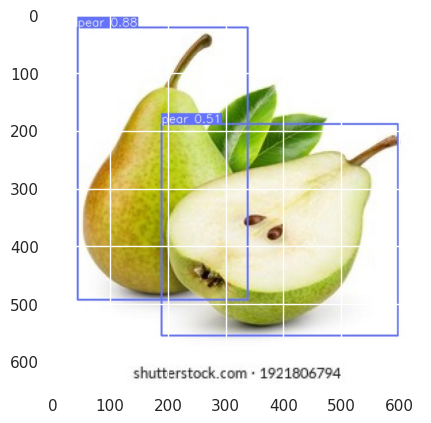

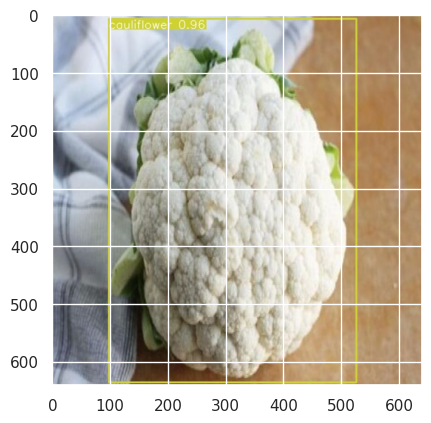

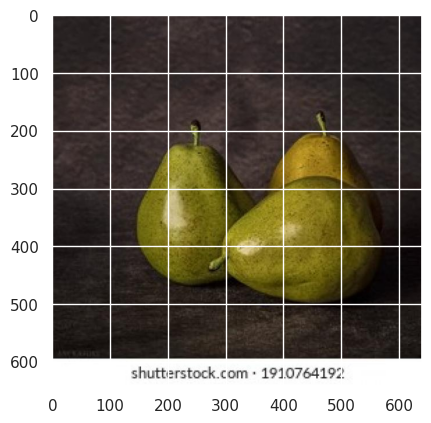

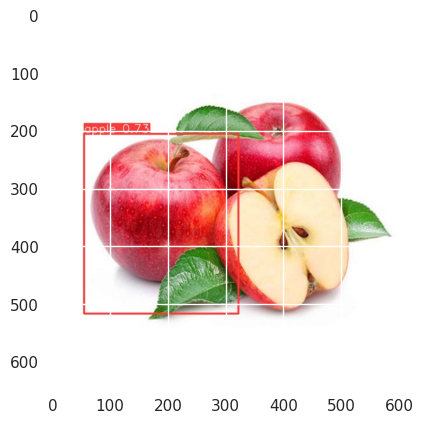

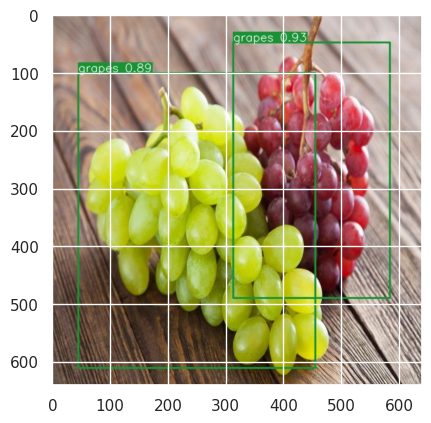

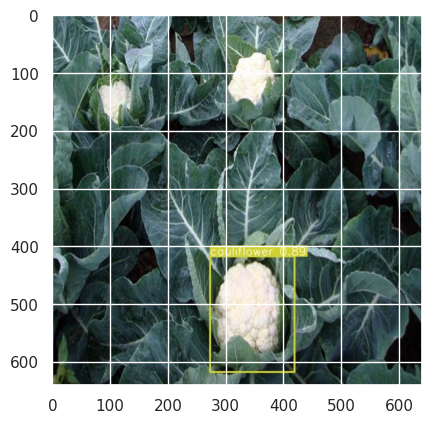

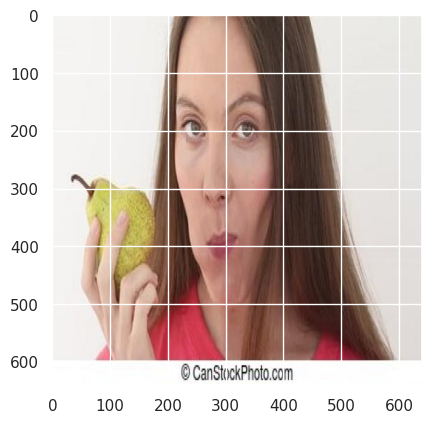

In [18]:
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()